In [1]:
!pip install plotly
!pip install country_converter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date
from numpy import mean
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import country_converter as coco
from urllib.request import urlopen
import json

In [3]:
url = 'https://raw.githubusercontent.com/amitfallach/Analysis-for-fun/main/ds_salaries.csv'
df= pd.read_csv(url)
df = df.copy() 
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [4]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df = df.drop("Unnamed: 0", axis = 1)

### I check the values density in 'work_year','salary','salary_in_usd' columns for future analyses

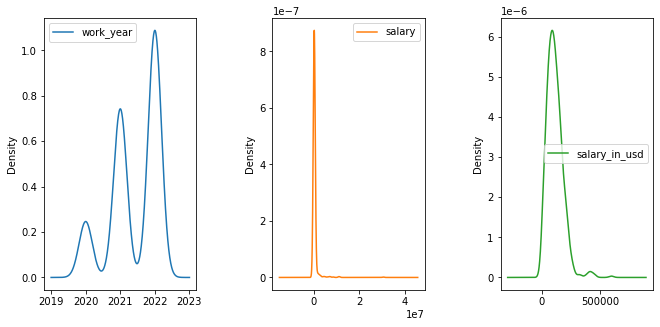

In [6]:
features = ['work_year','salary','salary_in_usd']

df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(1, 4), figsize=(15,5))
plt.subplots_adjust(wspace = 0.5);
plt.legend("upper right")
plt.show()

### change the measurement of "salary_in_usd" to shekels and use only rows of employees that work full-time job.

In [7]:
df = df.rename(columns= {'salary_in_usd':'salary_in_Shekel_per_month'})
df['salary_in_Shekel_per_month'] = df['salary_in_Shekel_per_month']*(3.3/12)

> # First of all, I checked the average salaries according to the company size

Text(0.5, 1.0, 'salary by company size')

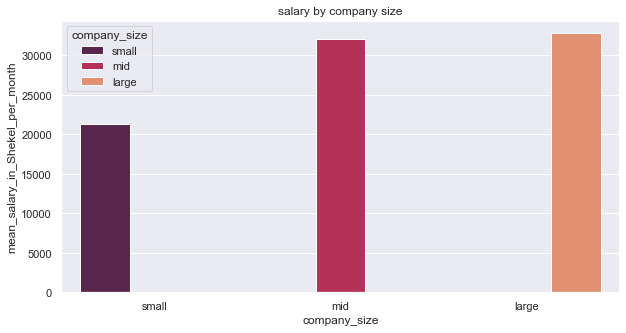

In [8]:
c_size = df[['company_size','salary_in_Shekel_per_month']]
small = df.loc[c_size['company_size']=='S']
mid = df.loc[c_size['company_size']=='M']
large = df.loc[c_size['company_size']=='L']
yaxis = [small['salary_in_Shekel_per_month'].mean(),mid['salary_in_Shekel_per_month'].mean(),large['salary_in_Shekel_per_month'].mean()]
xaxis = ["small","mid","large"]
data = {'company_size':xaxis,'mean_salary_in_Shekel_per_month':yaxis}
meansalary = pd.DataFrame(data)
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(x='company_size', y='mean_salary_in_Shekel_per_month',hue='company_size',data = meansalary , palette = "rocket")
plt.title('salary by company size')

> ## we can see from the dataset that :
> #### It is obvious that Mid size of company distributed along with higher salaries, and Large size company has higher salaries than Small size company.
> #### Thus, we can get a conclusion as large size company not necessarily has higher salaries than mid size company.

### Let's look how the column "job title" split

In [9]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)

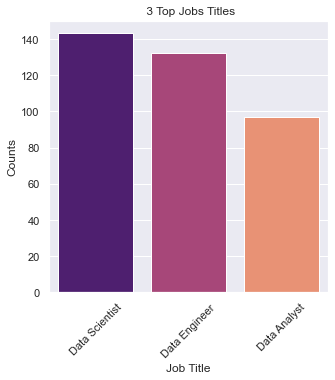

In [10]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.barplot(x='job_title',y=0,data = jobs[:3],palette = 'magma')
plt.title(' 3 Top Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [11]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

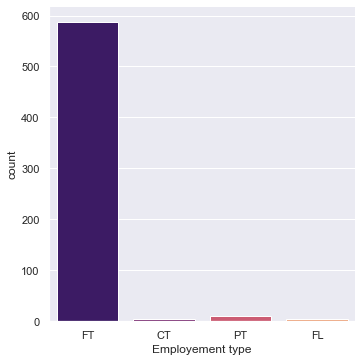

In [12]:
sns.catplot(x='employment_type',data = df,kind = 'count',palette = 'magma')
plt.xlabel('Employement type')
plt.show()

### Lets use only rows of employees that work full-time job.

In [13]:
df = df[df['employment_type']=="FT"].reset_index(drop = True)

> # check the salary for top 3 jobs on Entry-level by company size

In [14]:
df = df[df['experience_level']=="EN"].reset_index(drop = True)
top3 = df[(df['job_title']=="Data Analyst") | (df['job_title'] == "Data Engineer") | (df['job_title'] == "Data Scientist")].reset_index(drop = True)

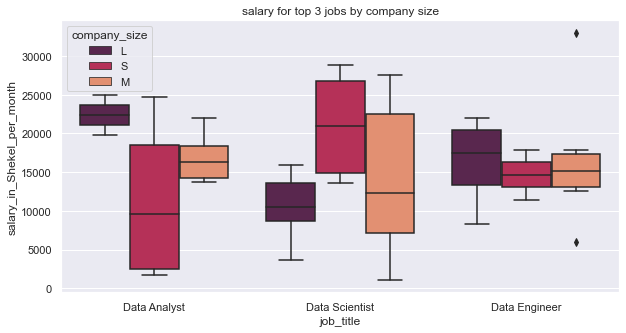

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'job_title', y = 'salary_in_Shekel_per_month', data=top3, hue='company_size',palette = "rocket")
plt.title('salary for top 3 jobs by company size')
plt.show()

### mean salary by company size for top 3 professions.

In [16]:
compmean =  top3.groupby(['job_title','company_size'])[['job_title','salary_in_Shekel_per_month']].mean()
compmean

salary_in_Shekel_per_month
job_title      company_size                            
Data Analyst   L                           22412.500000
               M                           16945.610000
               S                           11417.450000
Data Engineer  L                           16339.812500
               M                           16630.304167
               S                           14669.737500
Data Scientist L                           10550.375000
               M                           13994.268750
               S                           21006.104167

> ## We can see from the dataset that :
> #### When I looked at the data, I noticed that the data I have is not reliable . Therefore, I can't draw any conclusions.

> # check the salary for top 3 jobs on Entry-level by work year

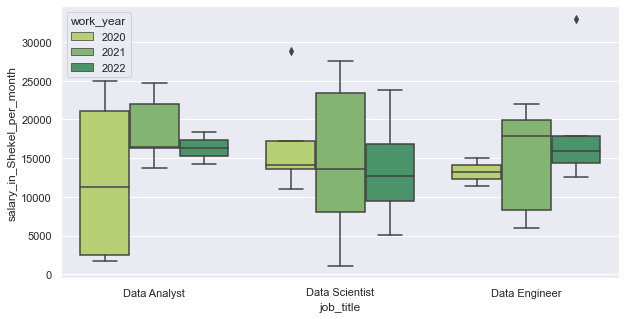

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot( x = 'job_title', y = 'salary_in_Shekel_per_month', data=top3, hue='work_year',palette = 'summer_r')
plt.show()

### the average salary in each year for the 3 professions.

In [18]:
top3.groupby(['job_title','work_year'])[['salary_in_Shekel_per_month']].mean()

salary_in_Shekel_per_month
job_title      work_year                            
Data Analyst   2020                      12311.20000
               2021                      18650.61000
               2022                      16362.50000
Data Engineer  2020                      13259.26250
               2021                      14826.79000
               2022                      18765.61500
Data Scientist 2020                      16952.70500
               2021                      14745.97500
               2022                      13580.94375

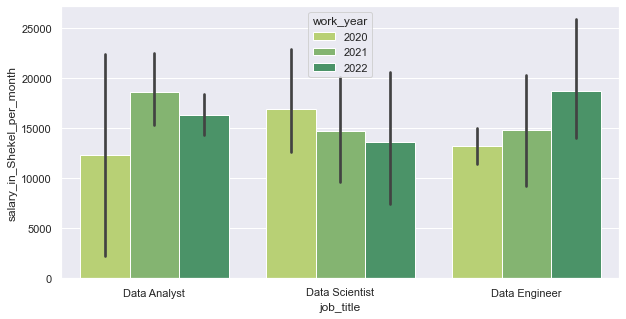

In [19]:
plt.figure(figsize=(10,5))
sns.barplot( x = 'job_title',y = 'salary_in_Shekel_per_month',data=top3 , hue='work_year',palette = 'summer_r')

> ## we can see from the dataset that :
> #### The average and the median salary was higher in 2021 for Data Analyst & Data Scientist and then in 2022 it decreased.
> #### The average salary was higher in 2022 for Data Engineer.

> # check the salary for top 3 jobs on Entry-level by company location

In [20]:
compsalary = top3.groupby(['job_title','company_location'])[['salary_in_Shekel_per_month']].mean()
compsalary.sort_values(by='salary_in_Shekel_per_month', ascending = False)

salary_in_Shekel_per_month
job_title      company_location                            
Data Scientist US                              24429.166667
               AU                              23843.325000
Data Engineer  US                              23203.125000
Data Analyst   US                              20304.166667
               CA                              16362.500000
Data Engineer  DE                              16297.416667
Data Analyst   FR                              16253.050000
Data Scientist DE                              15399.175000
               CA                              14408.900000
Data Engineer  GB                              13496.725000
Data Scientist FR                              12204.912500
Data Engineer  JP                              11464.475000
Data Scientist MY                              11000.000000
Data Engineer  IN                               7158.937500
Data Scientist IN                               7020.933333
               UA                               3685.000000
Data Analyst   NG                               2750.000000
               IN                               1669.800000
Data Scientist VN                               1100.000000

### [link to countries names shortcuts](http://help.ads.microsoft.com/#apex/18/he/10004/-1)

### Let's take the top 3 countries

Text(0.5, 1.0, 'salary for top 3 jobs by company_location')

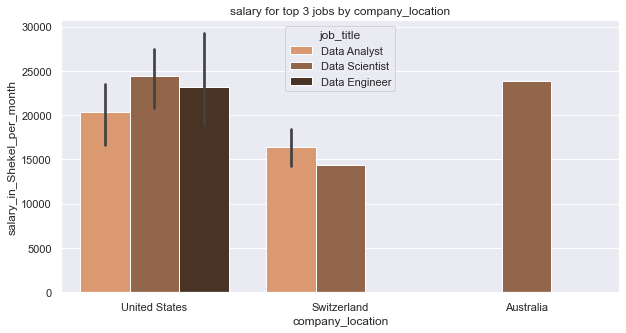

In [21]:
dflocation = top3[(top3['company_location']=="US") | (top3['company_location'] == "AU") | (top3['company_location'] == "CA")].reset_index(drop = True)
dflocation['company_location'] = dflocation['company_location'].str.replace('US', 'United States')
dflocation['company_location'] = dflocation['company_location'].str.replace('AU', 'Australia')
dflocation['company_location'] = dflocation['company_location'].str.replace('CA', 'Switzerland')
plt.figure(figsize=(10,5))
sns.barplot( x = 'company_location',y = 'salary_in_Shekel_per_month',data=dflocation , hue='job_title',palette = 'copper_r')
plt.title('salary for top 3 jobs by company_location')

> ## we can see from the dataset that :
> #### we can see that in USA , Australia and Switzerland have higher average salaries for Data Analyst, Data Engineer and Data Scientist on Entry level.

# Thanks For Watching !